In [2]:
import xarray as xr

In [3]:
dir_path = '/scratch/chsu/regional_mom6/'

In [4]:
from glob import glob
files = glob(f"{dir_path}/*.nc")

In [5]:
files

['/scratch/chsu/regional_mom6/ocean_monthly.199801-200212.tob.nc',
 '/scratch/chsu/regional_mom6/ocean_daily.19980101-20021231.tos.nc',
 '/scratch/chsu/regional_mom6/ocean_static.nc',
 '/scratch/chsu/regional_mom6/ocean_cobalt_tracers_month_z.199801-200212.o2.nc',
 '/scratch/chsu/regional_mom6/ocean_monthly_z.199801-200212.thetao.nc']

In [6]:
month_files = []
for file in files:
    if 'month' in file:
        month_files.append(file)
month_files.append('/scratch/chsu/regional_mom6/ocean_static.nc')

In [7]:
month_files

['/scratch/chsu/regional_mom6/ocean_monthly.199801-200212.tob.nc',
 '/scratch/chsu/regional_mom6/ocean_cobalt_tracers_month_z.199801-200212.o2.nc',
 '/scratch/chsu/regional_mom6/ocean_monthly_z.199801-200212.thetao.nc',
 '/scratch/chsu/regional_mom6/ocean_static.nc']

In [9]:
ds = xr.open_mfdataset(month_files,chunks={'time':1})

In [20]:
ds = ds.set_coords(['geolon','geolat','geolon_c','geolat_c','geolon_u','geolat_u','geolon_v','geolat_v'])

In [21]:
ds

<xarray.Dataset>
Dimensions:       (xh: 775, yh: 845, time: 61, xq: 776, yq: 846, nv: 2,
                   z_i: 53, z_l: 52)
Coordinates: (12/16)
  * xh            (xh) float64 -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh            (yh) float64 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * time          (time) datetime64[ns] 1980-01-01 ... 2002-12-16T12:00:00
  * xq            (xq) float64 -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yq            (yq) float64 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
    geolon        (yh, xh) float32 dask.array<chunksize=(845, 775), meta=np.ndarray>
    ...            ...
    geolat_u      (yh, xq) float32 dask.array<chunksize=(845, 776), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(846, 775), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(846, 775), meta=np.ndarray>
  * nv            (nv) float64 1.0 2.0
  * z_i           (z_i) float64 0.0 5.0 10.0 15.0 ... 5.5e+03 6e+03 6.5e+03
  * z_l           (z_l) float64 2.5 7.5 12.5 17.5 ... 5.25e+03 5.75e+03 6.25e+03
Data variables: (12/24)
    areacello     (yh, xh) float32 dask.array<chunksize=(845, 775), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(845, 775), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(845, 775), meta=np.ndarray>
    Coriolis      (yq, xq) float32 dask.array<chunksize=(846, 776), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(845, 775), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(846, 776), meta=np.ndarray>
    ...            ...
    average_T1    (time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    average_T2    (time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    o2            (time, z_l, yh, xh) float32 dask.array<chunksize=(2, 52, 845, 775), meta=np.ndarray>
    time_bnds     (time, nv) datetime64[ns] dask.array<chunksize=(2, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(2, 52, 845, 775), meta=np.ndarray>
    tob           (time, yh, xh) float32 dask.array<chunksize=(2, 845, 775), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          NWA12_MOM6_v1.0
    grid_type:      regular
    grid_tile:      N/A

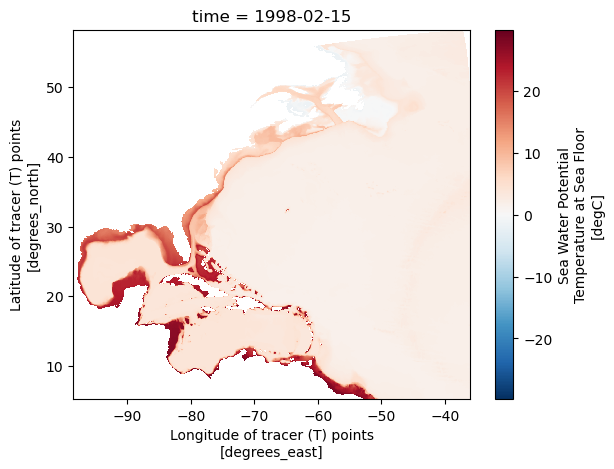

In [22]:
ds.tob.isel(time=2).plot(x='geolon',y='geolat')

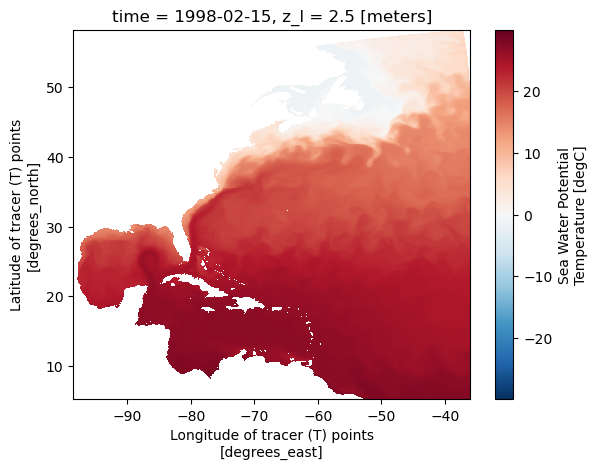

In [24]:
ds.thetao.isel(time=2,z_l=0).plot(x='geolon',y='geolat')

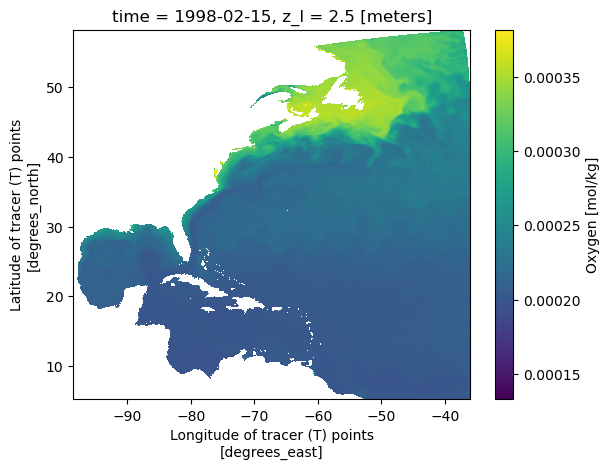

In [25]:
ds.o2.isel(time=2,z_l=0).plot(x='geolon',y='geolat')

In [159]:
ds.o2.attrs

{'units': 'mol/kg',
 'long_name': 'Oxygen',
 'cell_methods': 'area:mean z_l:mean yh:mean xh:mean time: mean',
 'cell_measures': 'volume: volcello area: areacello',
 'time_avg_info': 'average_T1,average_T2,average_DT'}

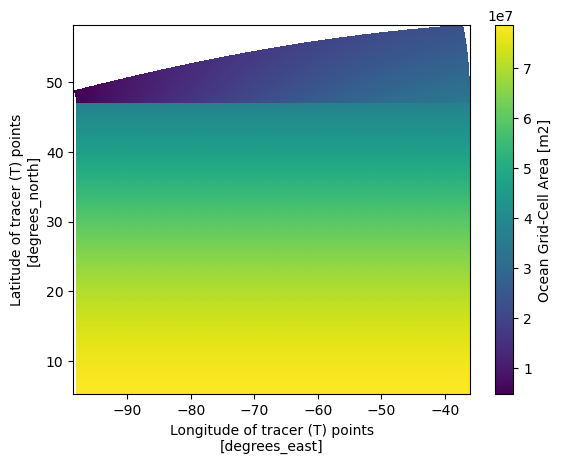

In [26]:
ds.areacello.plot(x='geolon',y='geolat')

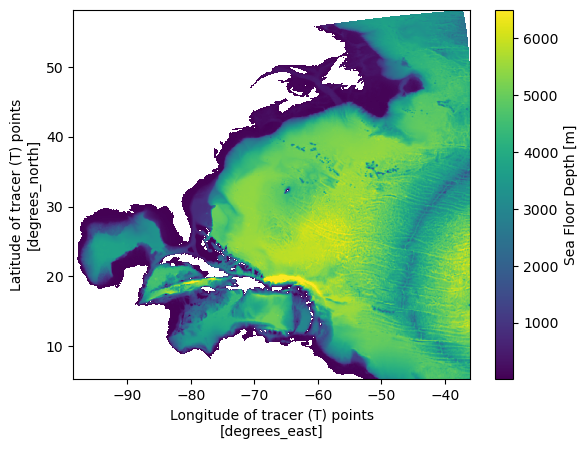

In [27]:
ds.deptho.plot(x='geolon',y='geolat')

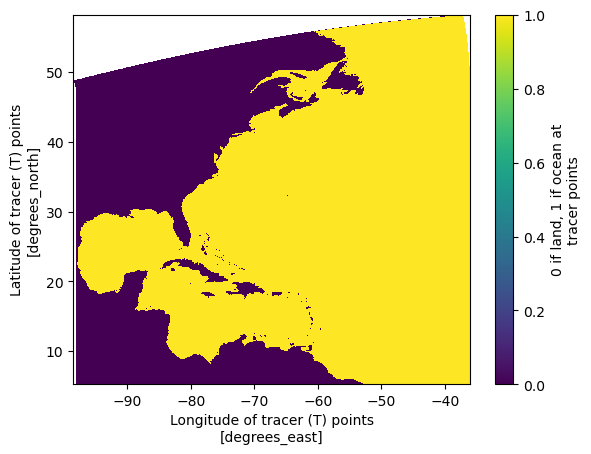

In [121]:
ds.wet.plot(x='geolon',y='geolat')

In [131]:
np.where(ds.wet.isnull().values)

(array([], dtype=int64), array([], dtype=int64))

In [169]:
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

def plot_east_coast(da,level,da_lmask,lon='geolon',lat='geolat',cmap='viridis',colorbar_labelname='sea floor depth below geoid (m)',clabel_format="%0.0f",data_land=True):
    
    fig=plt.figure(2,figsize=(9,9))
    ax2=fig.add_axes([0,0,1,1],projection=ccrs.PlateCarree(central_longitude=-60))
    ax2.set_aspect('auto')

    if data_land:
        im=da_lmask.plot.pcolormesh(x=lon,
                                    y=lat,
                                    ax=ax2, 
                                    levels=np.arange(0,1+1),
                                    cmap='binary_r',
                                    transform=ccrs.PlateCarree(central_longitude=0))
        im.colorbar.remove()
    
    im=da.plot.pcolormesh(x=lon,
                                 y=lat,
                                 ax=ax2, 
                                 levels=level, 
                                 extend='both', 
                                 cmap=cmap,
                                 transform=ccrs.PlateCarree(central_longitude=0))

    im.colorbar.remove()
    cbaxes=fig.add_axes([0.7,0,0.02,1])
    cbar=fig.colorbar(im,cax=cbaxes,orientation='vertical')
    cbar.set_ticks(level)
    cbar.set_ticklabels([clabel_format%(n) for n in level])
    cbar.ax.tick_params(labelsize=20,rotation=0) 
    cbar.set_label(label=colorbar_labelname,size=20, labelpad=15)
    # ax2.coastlines(resolution='50m',linewidths=0.3)
    # # ax2.add_feature(cfeature.LAND,color='lightgrey') 
    if not data_land:
        land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face',
                                                facecolor=cfeature.COLORS['land'])
        ax2.add_feature(land_10m,color='lightgrey')
    

    ax2.set_xticks([270,280,290,300,310,320], crs=ccrs.PlateCarree())
    ax2.set_xticklabels([-90,-80,-70,-60,-50,-40], color='black', weight='bold',size=22,rotation=45)
    ax2.set_yticks([10,20,30,40,50], crs=ccrs.PlateCarree())
    ax2.set_yticklabels([10,20,30,40,50], color='black', weight='bold',size=22)
    ax2.yaxis.tick_left()

    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)
    ax2.grid(linewidth=2, color='black', alpha=0.1, linestyle='--')
    ax2.set_xlabel('')
    ax2.set_ylabel('')
    ax2.set_title('', color='black', weight='bold',size=22)
    
    return fig


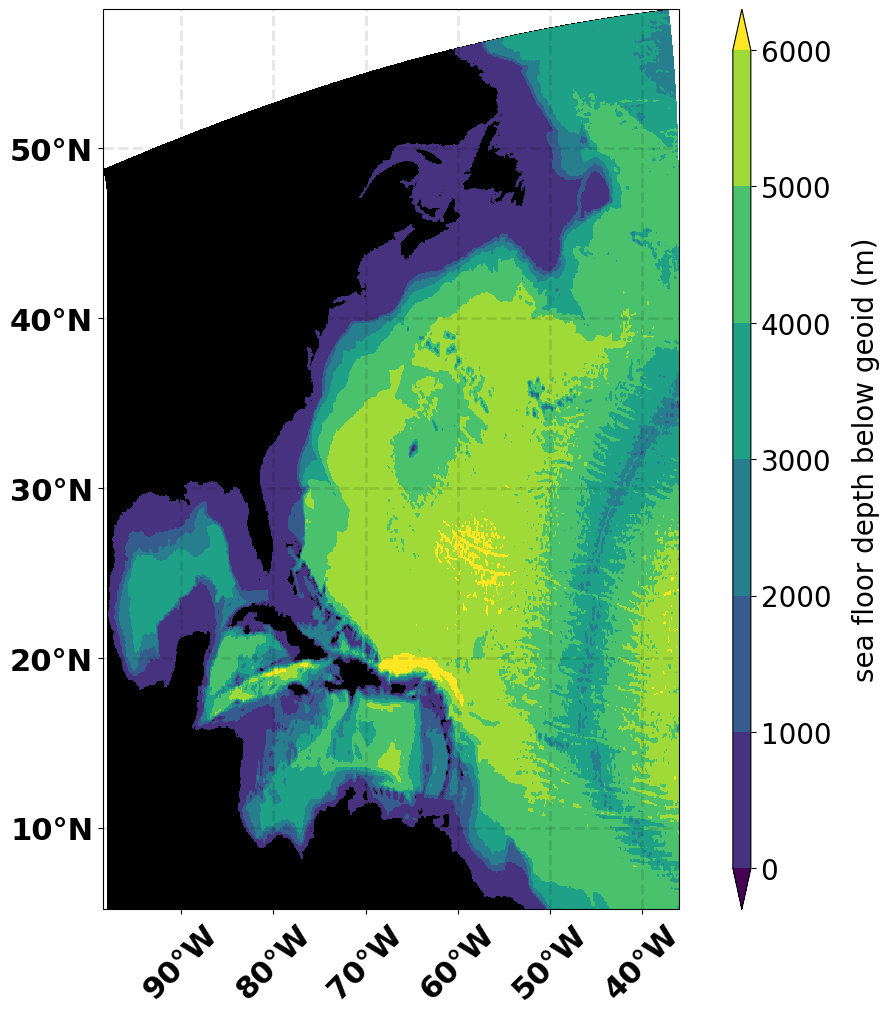

In [170]:
fig = plot_east_coast(ds.deptho,np.arange(0,6001,1000),ds.wet,lon='geolon',lat='geolat',cmap='viridis',colorbar_labelname='sea floor depth below geoid (m)',data_land=True)
fig.savefig('figures/deptho.png',
            dpi=300,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            format='png',
            transparent=False,
            bbox_inches="tight",
            pad_inches=None)

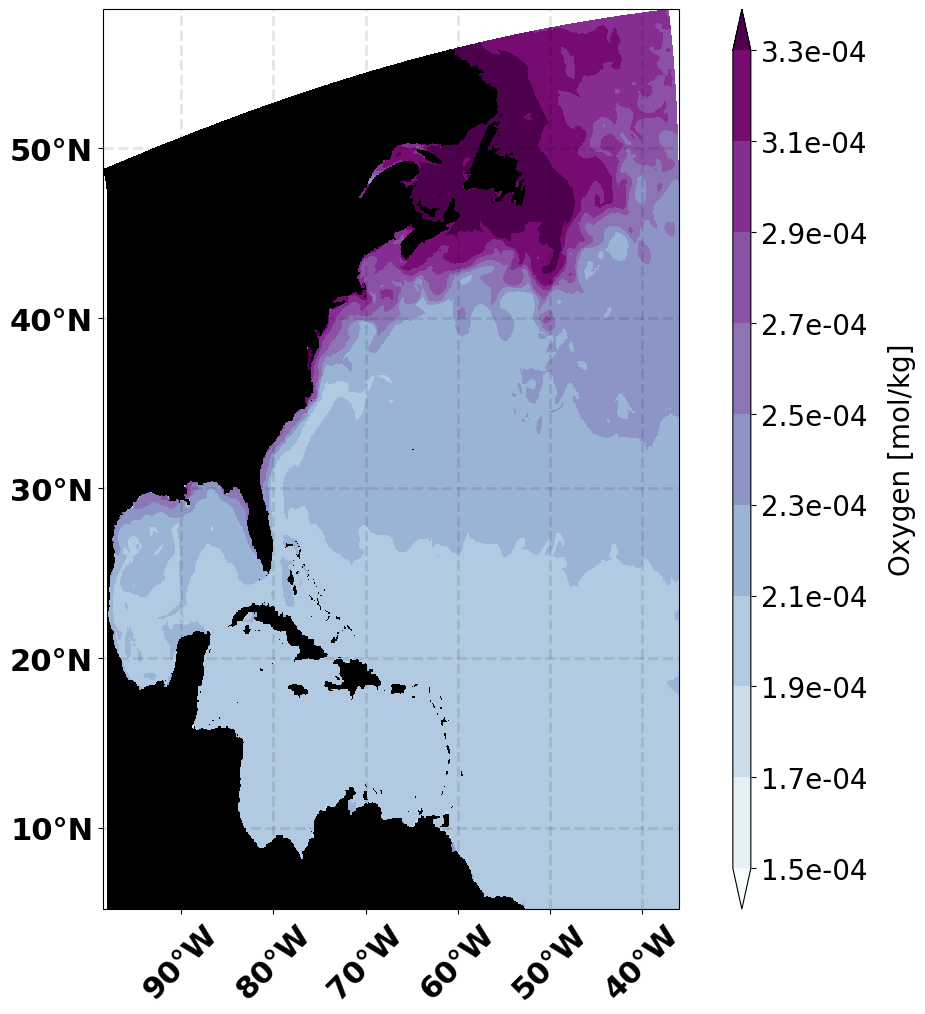

In [181]:
fig = plot_east_coast(ds.o2.isel(time=1,z_l=0,drop=True),np.arange(0.00015,0.00035,0.00002),ds.wet,
                      lon='geolon',lat='geolat',cmap='BuPu',
                      colorbar_labelname=f'{ds.o2.attrs["long_name"]} [{ds.o2.attrs["units"]}]',
                      clabel_format='%0.1e',data_land=True)
fig.savefig('figures/o2.png',
            dpi=300,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            format='png',
            transparent=False,
            bbox_inches="tight",
            pad_inches=None)

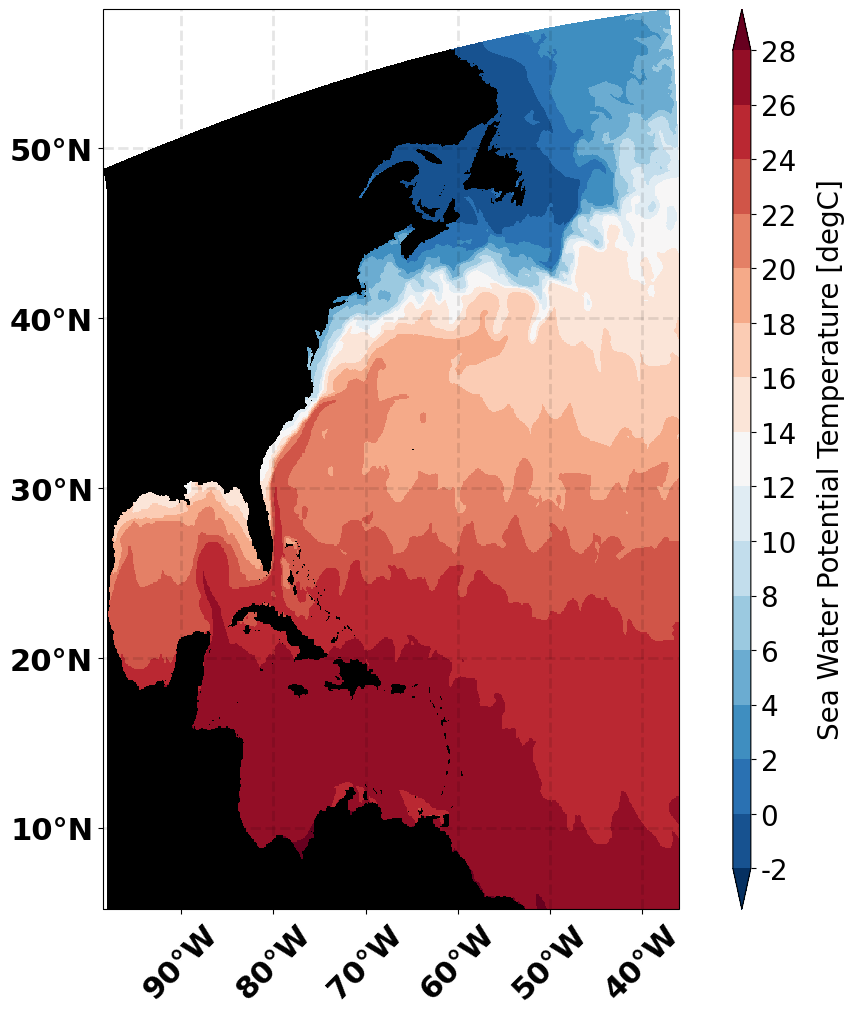

In [187]:
fig = plot_east_coast(ds.thetao.isel(time=2,z_l=0,drop=True),np.arange(-2,28+1,2),ds.wet,
                      lon='geolon',lat='geolat',cmap='RdBu_r',
                      colorbar_labelname=f'{ds.thetao.attrs["long_name"]} [{ds.thetao.attrs["units"]}]',
                      clabel_format='%0.0f',data_land=True)
fig.savefig('figures/thetao.png',
            dpi=300,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            format='png',
            transparent=False,
            bbox_inches="tight",
            pad_inches=None)

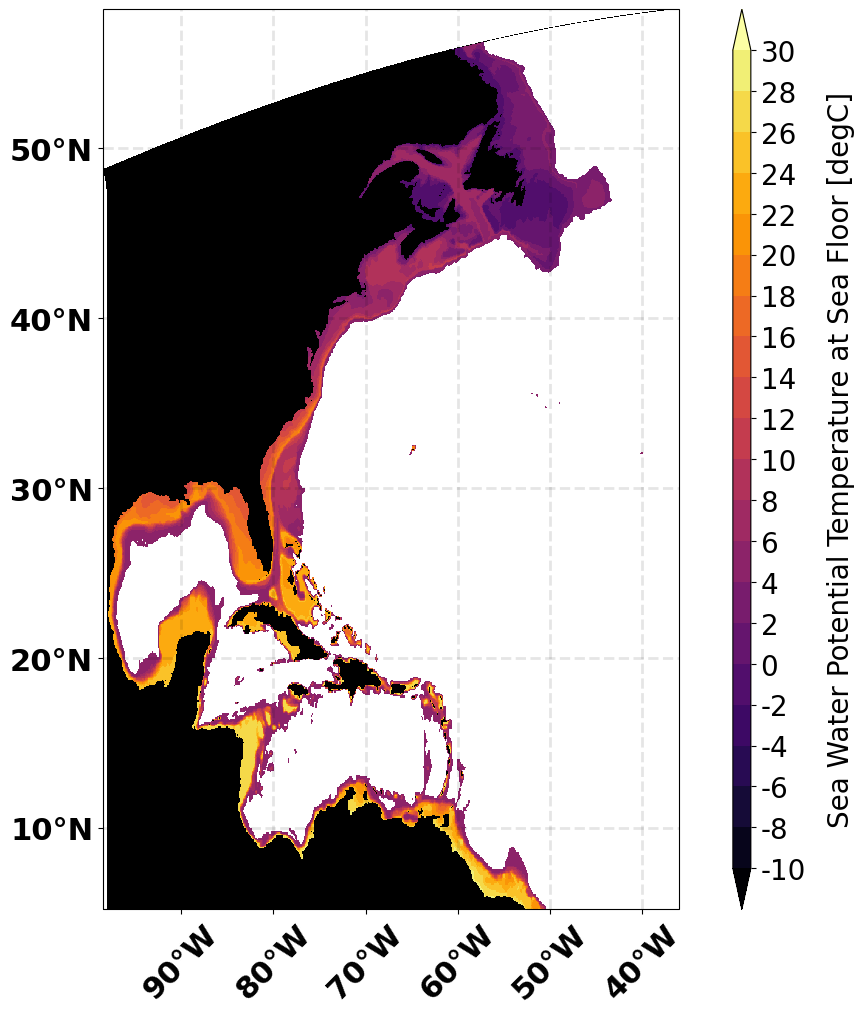

In [192]:
da = ds.tob.isel(time=2).where(ds.deptho<1500)
fig = plot_east_coast(da,np.arange(-10,30+1,2),ds.wet,
                      lon='geolon',lat='geolat',cmap='inferno',
                      colorbar_labelname=f'{da.attrs["long_name"]} [{da.attrs["units"]}]',
                      clabel_format='%0.0f',data_land=True)
fig.savefig('figures/tob.png',
            dpi=300,
            facecolor='w',
            edgecolor='w',
            orientation='portrait',
            format='png',
            transparent=False,
            bbox_inches="tight",
            pad_inches=None)